# *Predicting Politicians' Parties by Processing Political Preferences*

## *This Notebook examines each member of Congress in 1984 and considers how they voted on each of 16 key bills presented throughout the year.*
## *The dataset includes a list of the individual's party, followed by a "y" for "yes" or "n" for "no" corresponding to each of 16 bills.*
### *This data was provided by the Congressional Quarterly Almanac of the 98th Congress. There were 267 Democrats and 168 Republicans in the House of Representatives at this time.*


.

## Import all needed libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np




## Begin by opening the file and loading the CSV into a Python dictionary.
### In each of the 16 bills (dimensions), we assume "y" = 1, "n" = 0, and "?" = 0.
The "?" means that the individual did not vote "yes" or "no" on the bill, i.e. they abstained or voted "present". We will consider a "?" to be the same as a "N" since the member did not actively vote in favor of the bill.

In [2]:
f = open("Documents/datasets/1984congress/house-votes-84.data")

In [3]:
dataset = []
for l in f:
    l = l.split(',')
    party = l[0]=='democrat' and 1 or 0 # Democrats are 1, Republicans are 0
    values = [party]
    count=0
    for i in l:
        count+=1
        if count>1:
            values.append(i=="y" and 1 or 0) # assumes unknown = vote against
    dataset.append(values)

## Open the CSV data using the "pandas" library as well.
This will allow us to have two different types of arrays that both gives us different options later on.

In [4]:
data = pd.read_csv("Documents/datasets/1984congress/house-votes-84.data",header=None)

X = data.iloc[:,1:]
y = data.iloc[:,0]

X = X.replace({'y':1,'n':0,'?':0}) # Make the code quantitative and binary
y = y.map({'republican':0,'democrat':1}) # Again, make the code quantitative so it can be mathematically modeled

## Create a new, blank regression model

In [5]:
model = LogReg()

## Define testing / training lists for regression analysis. We will be predicting each Member's POLITICAL PARTY based on how that Member voted on each bill.

## This is a form of CLASSIFICATION, because we are putting individuals into a binary category (Democrat or Republican) based on 16 dimensions of input data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=69)

## Set up the regression model using the delegated training data, which includes 80% of all values in the dataset, selected at random (there are 435 total values)

In [7]:
model.fit(X_train,y_train)

LogisticRegression()

## Run a test on the remaining 20% of data using the regression model

In [8]:
y_pred = model.predict(X_test)

### Calculate the accuracy of our regression model on our testing data

In [9]:
accuracy = accuracy_score(y_test,y_pred)

## The accuracy of our model is 98.85%. This means that out of 87 members of Congress in our testing data, only 1 had their political party predicted wrong.
### Note that this number could vary depending on the random_state value defined earlier, which determines which Members are in the testing or training group.

In [10]:
accuracy

0.9885057471264368

# The code below will give us a visual of the distribution of votes by party and bill.

### We simply find the total number of Democrats/Republicans who voted "Yes" or "No" on each bill, then graph the results. Note that I weighted the graphic such that the Democrats and Republicans take up an equal amount of space, since there were significantly more Democrats than Republicans in the House at the time.

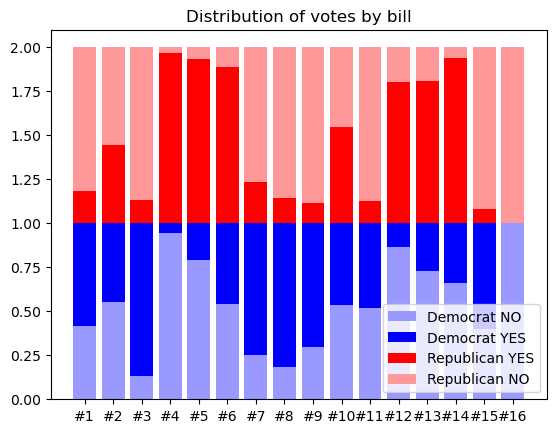

In [11]:
headings = []

for i in range(16):
    n = i + 1
    headings.append("#"+str(i+1))

demTotal = sum(d[0] for d in dataset)
repTotal = 435 - demTotal

weightsD1 = []
for n in range(16):
    weightsD1.append(sum(d[n+1] for d in dataset if d[0]==1))
    
weightsDem = []
for sub in weightsD1:
    weightsDem.append(sub)
    weightsDem.append(demTotal-sub)
weightsDem = np.array(weightsDem)
    
weightsR1 = []
for n in range(16):
    weightsR1.append(sum(d[n+1] for d in dataset if d[0]==0))
    
weightsRep = []
for sub in weightsR1:
    weightsRep.append(sub)
    weightsRep.append(repTotal-sub)
weightsRep = np.array(weightsRep)

weight_counts = {
    "Democrat NO": [1 -sum(d[n] / demTotal for d in dataset if d[0]==1) for n in range(1,17)],
    "Democrat YES": [sum(d[n] / demTotal for d in dataset if d[0]==1) for n in range(1,17)],
    "Republican YES": [sum(d[n] / repTotal for d in dataset if d[0]==0) for n in range(1,17)],
    "Republican NO": [1 -sum(d[n] / repTotal for d in dataset if d[0]==0) for n in range(1,17)],
}
width = 0.8

fig, ax = plt.subplots()
bottom = np.zeros(16)

colorIndex = 0
colors = ["#9999ff","#0000ff","#ff0000","#ff9999"]

for boolean, weight_count in weight_counts.items():
    p = ax.bar(headings, weight_count, width, label=boolean, bottom=bottom,color=colors[colorIndex])
    bottom += weight_count
    colorIndex += 1

ax.set_title("Distribution of votes by bill")
ax.legend(loc="best")

plt.show()

# Enjoy the graphic!
### This graphic shows how much support each bill got from each party.
### Solid colors indicate "Yes" votes, and faded colors indicate "No" / abstain votes.
### The illusion of a dark "bar" near the middle of each column indicates which party typically supported that bill. A bar that is mostly below the middle indicates strong Democrat support, while a bar mostly above the middle indicates strong Republican support.

# OVERALL FINDINGS

### In this project, the main takeaway is that a probabilistic model can almost perfectly predict an congressmember's party alignment just by knowing how they voted on various bills.
### This demonstrates that political ideology has a strong impact in the decisions that lawmakers make on a regular basis.